# Project 2 Abalone dataset

Predicting the age of Abalone from physical measurments  

## Importing standard libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [62]:
data=pd.read_csv('aba.csv')

In [61]:
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Information of the dataset

Sex = Nominal variable with Male,Female,Infant Categories

Length = Contineous variable Length of the shell

Diamater = Contineous variable Diameter of the shell

Height = Contineous variable meat in the shell

Whole_weight = Contineous Varibale whole weight of abalone

Shucked_weight = Contineous varibale weight of the meat

Viscera_weight = contineous varibale weight of gut after bleeding

shell_weight = contineous varibale weight of the shell after being dried

Ring= Number of ring after the cut + 1.5 gives the age in years.

## Lets check the Null Values 

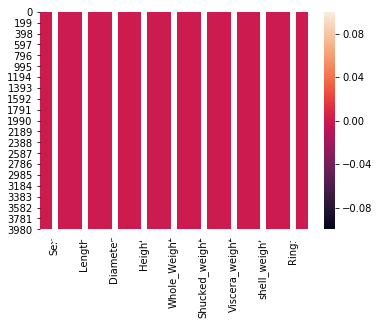

In [63]:
sns.heatmap(data.isnull(), annot=True)
plt.show()

In [64]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_weight    0
Viscera_weight    0
shell_weight      0
Rings             0
dtype: int64

In [65]:
data.shape

(4177, 9)

In [44]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

# Statistical Summary

In [66]:
data.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Lets Do the EDA 

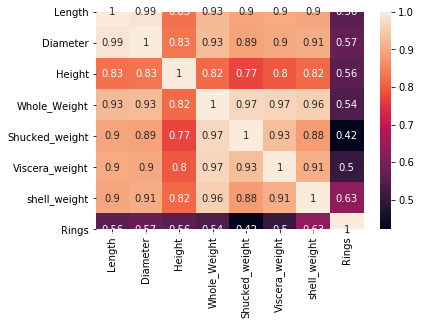

In [45]:
sns.heatmap(data.corr(),annot=True)

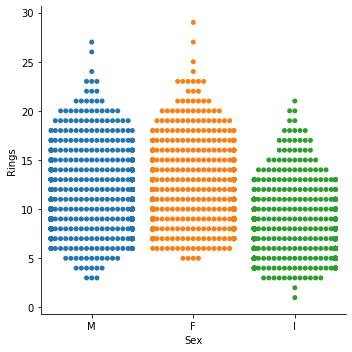

In [46]:
sns.catplot(x='Sex',y='Rings',data = data, kind='swarm')

From the above graph we can see that the Female category has Highest Number of rings or age

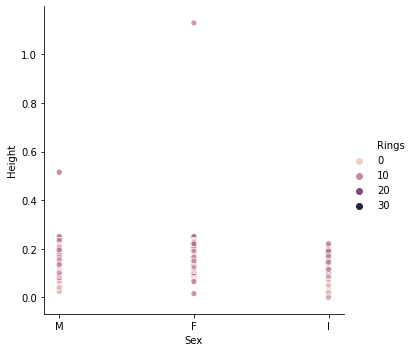

In [47]:
sns.relplot(x='Sex',y='Height',hue='Rings', data=data)

From the above graph we can see that the hight is between 0 to 4, however there are some outliers

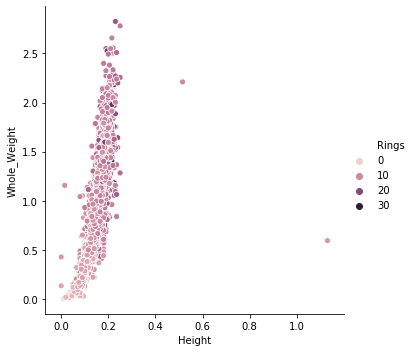

In [48]:
sns.relplot(x='Height',y='Whole_Weight',hue='Rings', data=data)

From the above graph we can see that as the height increases the weight is also increases

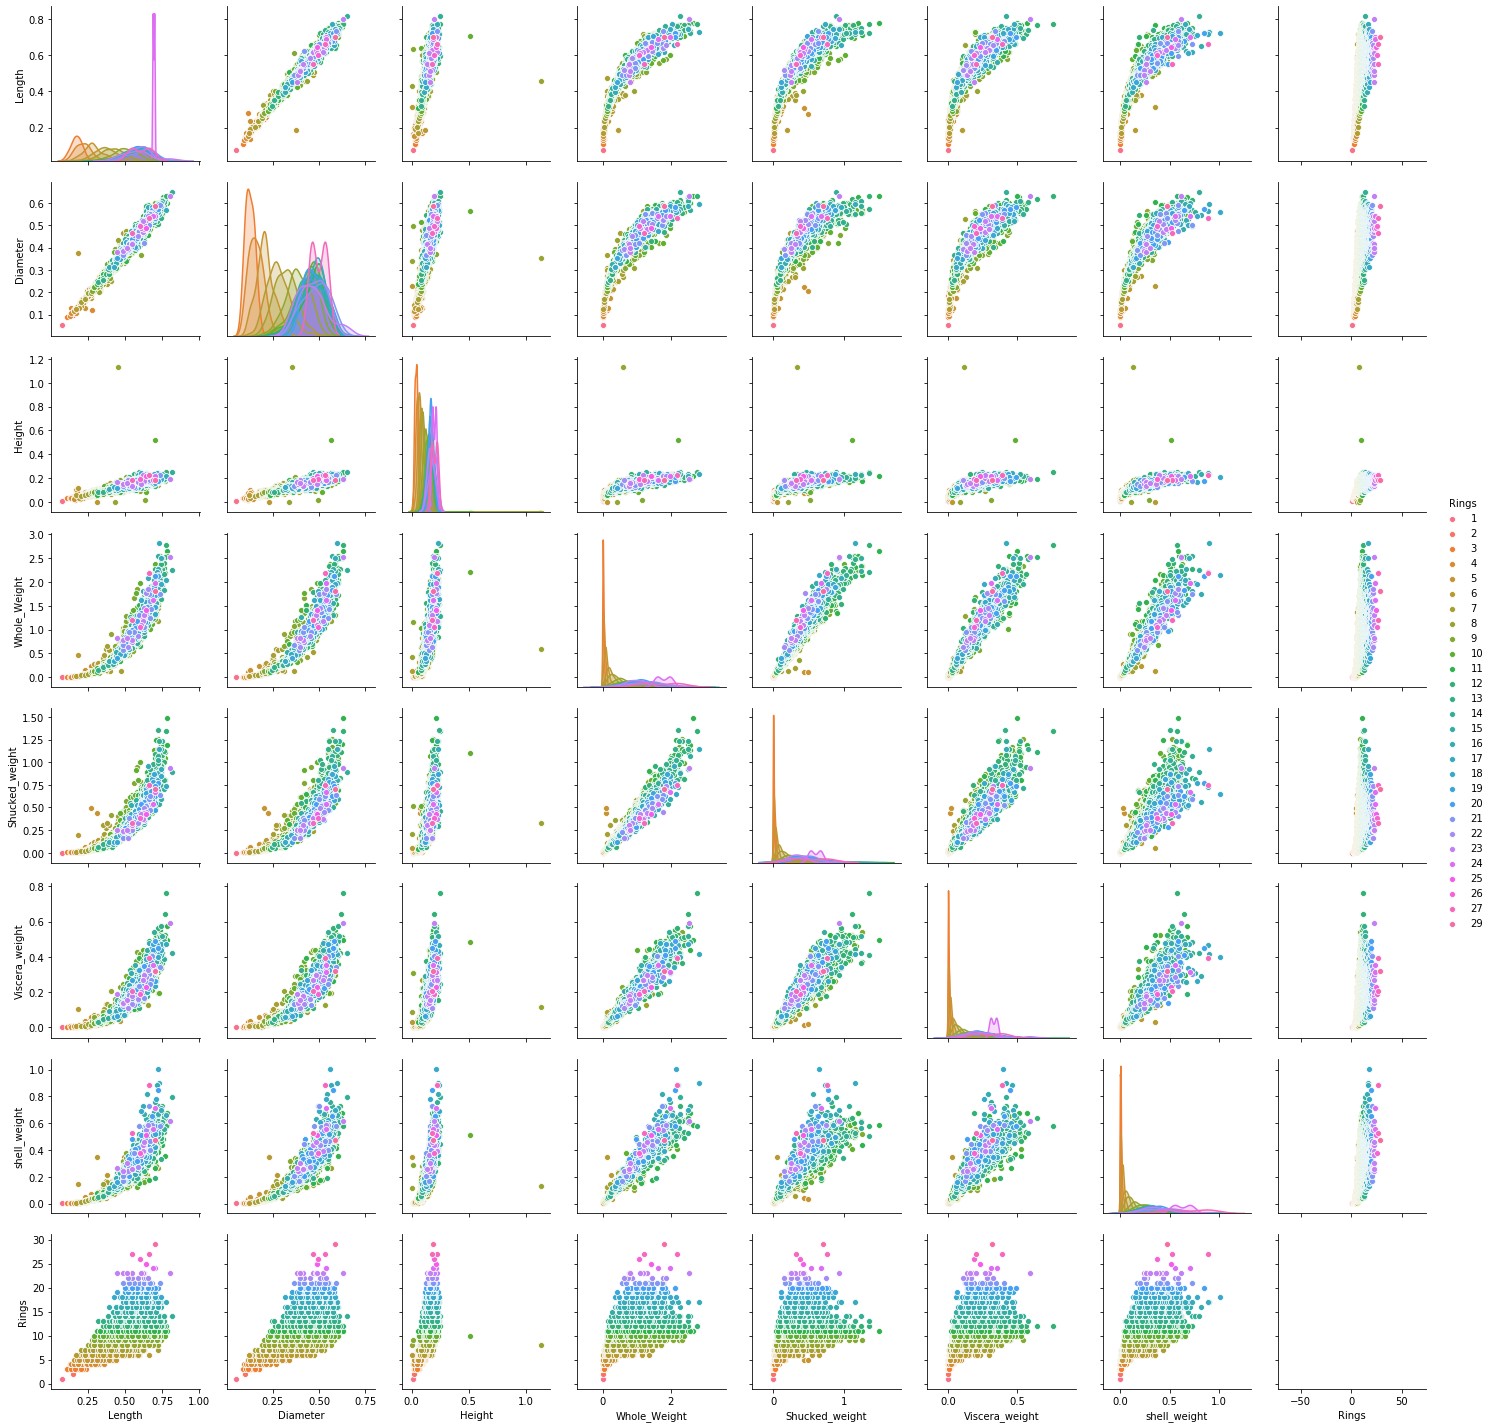

In [49]:
sns.pairplot(data, hue='Rings')

## Now lets encode sex variable

In [50]:
data['Sex']=data['Sex'].map({'I':0,'M':1,'F':2})

In [51]:
data.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Lets Remove Outlier from the dataset

In [55]:
from scipy.stats import zscore
data=data[(np.abs(zscore(data))<3).all(axis=1)]

In [56]:
data.shape

(4027, 9)

## Lets split the dependent varibales and independent variables

In [57]:
x= data.iloc[:,:-1]
x.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_weight,Viscera_weight,shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [59]:
y=data['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

## Lets Scale the independent variables

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [123]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)        

In [124]:
x_train.shape,x_test.shape

((2818, 8), (1209, 8))

In [125]:
y_train.shape,y_test.shape

((2818,), (1209,))

## Lets Implement ML Algorithms

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [127]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=45)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=45)
RFR=RandomForestRegressor(random_state=45)
GBR=GradientBoostingRegressor(random_state=45)

In [128]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [129]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [130]:

Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.5428618951690796
Mean_Squared_Error = 3.9743334715164553
Mean_Absolute_Error = 1.503027578831386
Root_Mean_Squared_Error = 1.9935730414299988
Cross_Val_Score =  0.3852748782834617


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.2665712742710231
Mean_Squared_Error = 6.376388891743016
Mean_Absolute_Error = 1.9120341986542135
Root_Mean_Squared_Error = 2.5251512611610054
Cross_Val_Score =  0.12920751517832368


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ran

In [131]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.542862,3.974333,1.503028,1.993573,0.385275
1,Lasso,0.266571,6.376389,1.912034,2.525151,0.129208
2,Ridge,0.542541,3.977121,1.503270,1.994272,0.385848
3,DecisionTreeRegressor,0.171152,7.205955,1.937138,2.684391,-0.185352
4,KNeighborsRegressor,0.500819,4.339851,1.506038,2.083231,0.370843
5,AdaBoostRegressor,0.437988,4.886103,1.823155,2.210453,0.048036
6,RandomForestRegressor,0.533835,4.052812,1.492556,2.013160,0.372148
7,GradientBoostingRegressor,0.578513,3.664388,1.403389,1.914259,0.442342


From the above comparison we can see that Gradient Boosting Regressor is working the best as R2_score is high and      MSE,MAE,RMSE is low, so we will select Gradient Boosting as our final Model.

In [132]:
from sklearn.externals import joblib

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [134]:
joblib.dump(GBR,'model_abloneML_data.csv')

['model_abloneML_data.csv']

In [135]:
model=joblib.load('model_abloneML_data.csv')

In [137]:
model.predict(x_test)

array([ 8.615567  , 10.22819289,  4.79214017, ..., 10.23588065,
       10.09499961, 11.85838951])